In [1]:
import qiskit
from qiskit.visualization import plot_bloch_multivector,plot_histogram
from math import pi

In [2]:
def qft_trans(qc,n):
    for i in range(n):
        qc.h(i)
        for j in range(i+1,n): 
            qc.cu1(pi/2**(j-i),j,i)
#         qc.barrier()


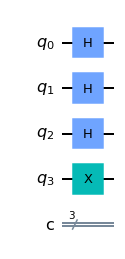

In [3]:

qc = qiskit.QuantumCircuit(4,3)
qc.h([0,1,2])
qc.x(3)
qc.draw('mpl')


/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  This is separate from the ipykernel package so we can avoid doing imports until


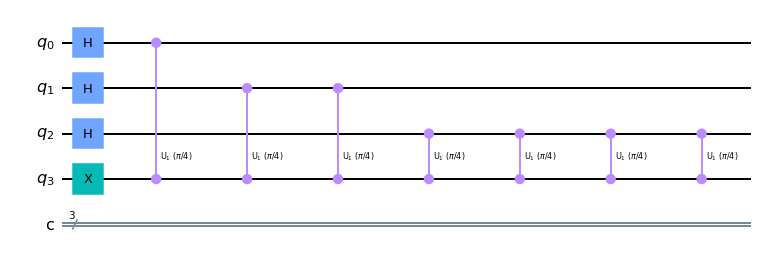

In [4]:
for i in range(3):
    for j in range(0,2**i):
        qc.cu1(pi/4,i,3)
qc.draw('mpl')

/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """


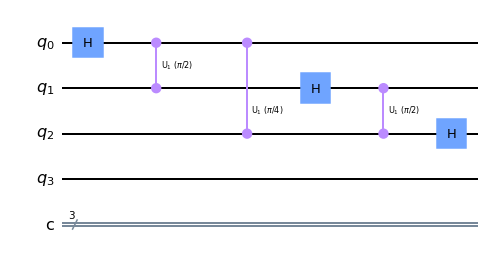

In [5]:
qft_qc = qiskit.QuantumCircuit(4,3)
qft_trans(qft_qc,3)
qft_qc.draw('mpl')

In [6]:
qft_inv = qft_qc.inverse()

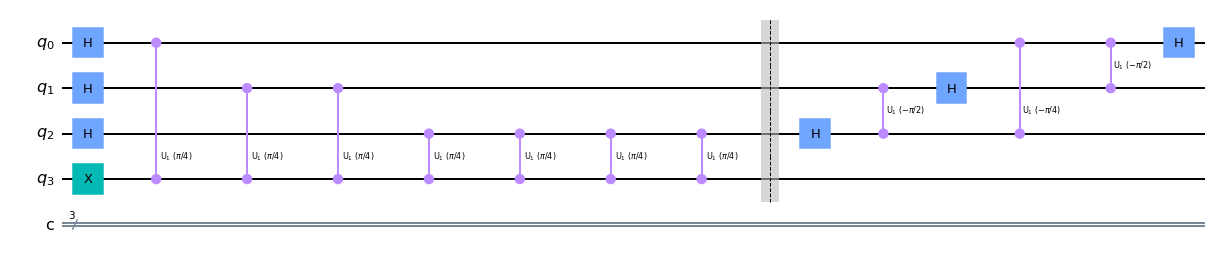

In [7]:
qc.barrier()
qc = qc.combine(qft_inv)
qc.draw('mpl')

In [8]:
qc.measure([0,1,2],[0,1,2])

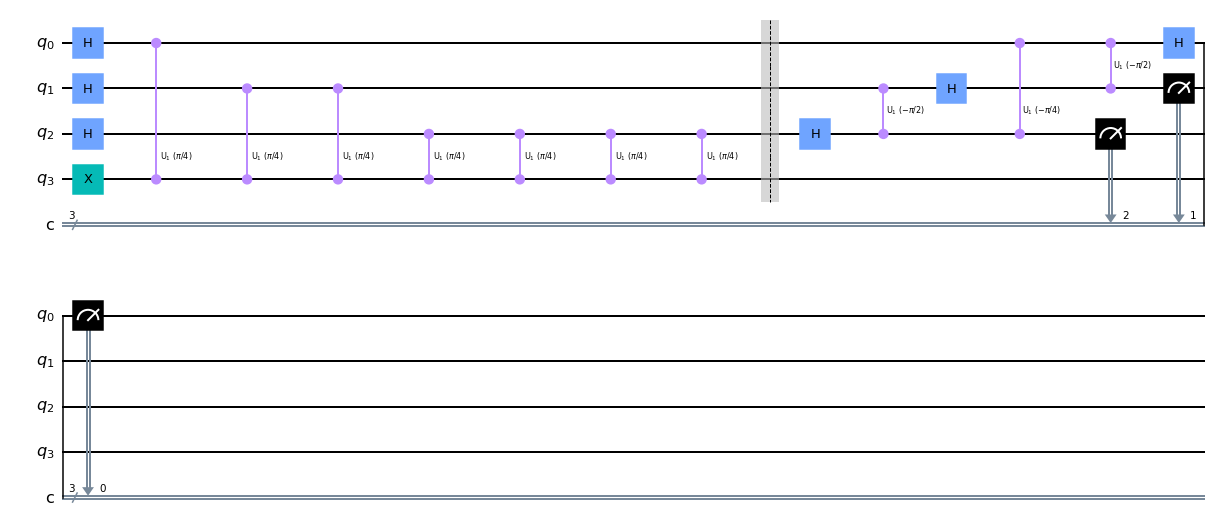

In [9]:
qc.draw('mpl')

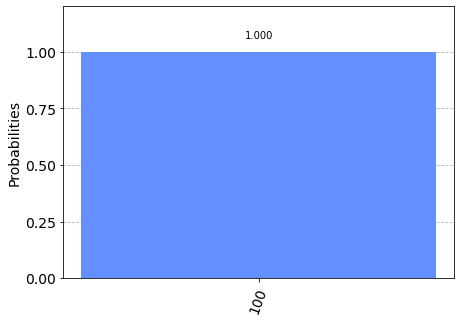

In [10]:
simulator = qiskit.Aer.get_backend('qasm_simulator')
counts = qiskit.execute(qc,simulator).result().get_counts()
plot_histogram(counts)

#  General case  

In [11]:
n = 3 
angle = pi/4

/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if __name__ == '__main__':


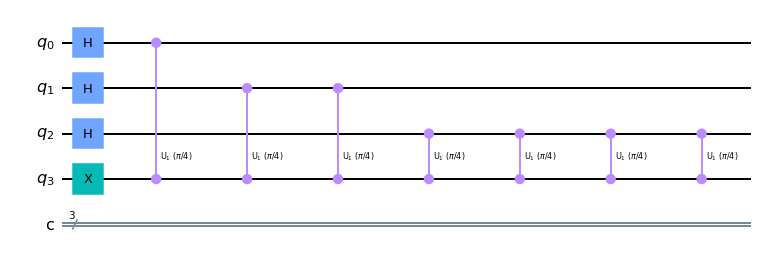

In [12]:
qc = qiskit.QuantumCircuit(n+1,n)
qc.h([x for x in range(n) ])
qc.x(n)

# createing phase estimation circuit 

for i in range(n):
    for j in range(2**i):
        qc.cu1(angle,i,n)

qc.draw('mpl')

/Users/samarth/Desktop/qiskitSS/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  """


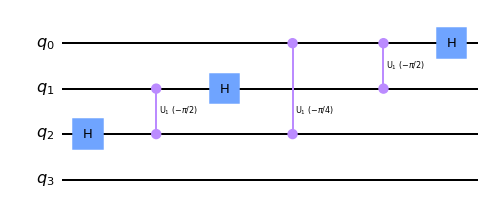

In [13]:
# Creating inverse qft circuit 

qft_qc = qiskit.QuantumCircuit(n+1)
qft_trans(qft_qc,n)
qft_inv = qft_qc.inverse()
qft_inv.draw('mpl')


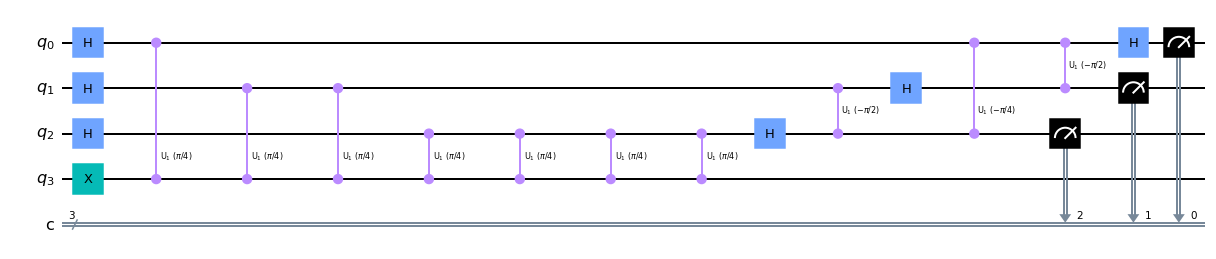

In [14]:
# Combining both circuits

qc = qc.combine(qft_inv)
qc.measure([x for x in range(n)],[x for x in range(n)])
qc.draw('mpl')

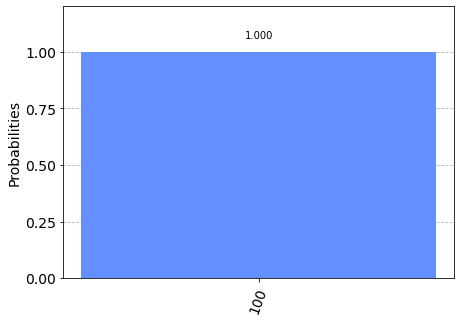

In [15]:
simulator = qiskit.Aer.get_backend('qasm_simulator')
shots = 2080
counts = qiskit.execute(qc,simulator,shot= shots).result().get_counts()
plot_histogram(counts)